# Pytorch Workflow

Lets explore an example of the PyTorch end-to-end workflow.

In [1]:
what_were_covering = {1: "Get Data Ready", 2: "build model", 3: "fitting the model to the data (training)", 4: "making predictions and evaluating model", 5: "saving and loading a model", 6: "putting it all together"}
what_were_covering

{1: 'Get Data Ready',
 2: 'build model',
 3: 'fitting the model to the data (training)',
 4: 'making predictions and evaluating model',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn ## nn contains all of PyTorches building blocks for neural networks
import matplotlib.pyplot as plt

# cvheck PyTorch version
torch.__version__

'1.13.0'

## 1. Data (preparing and loading)

Data can be almost anything ... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (youtube has lots of data)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn paters in that numerical representation. 

To showcase this, lets create some *known* data using the linear regression formula.

we'll use a linear regression formula to make a straight line with known parameters.

In [3]:
# Create known parameters

weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and sets ( one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[: train_split], y[: train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [8]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        #plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14});

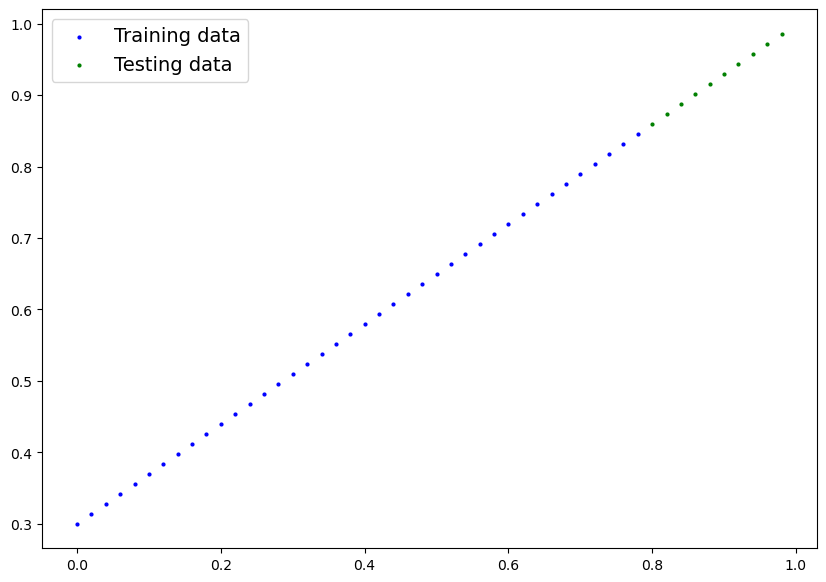

In [9]:
plot_predictions();

## 2. Build model

Our first PyTorch Model!

This is very exiting ... lets do it!

Because we are going to be building classes through the course, 
I'd recommend getting familiar with OOP in Pyuthon, to do so you can use the following resource from Real Python: https://realpython.com/python3-object-oriented-programming/

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so?

Through tow main algorithms:
1. Gradient descent
2. Backpropagation

In [37]:
from torch import nn

# Create linear regression model class

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad=True,
                                                dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float32))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [38]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### PyTorch model building essentials

* torch.nn contains all the building blocks for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient decent. 
* def forward() - all nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation. 

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [87]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)

model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [92]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions with `torch.inference_mode()`

to check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through out model, it's going to run it through the `forward()` method.

In [91]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [90]:
# Make predictions with the model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

# You can also do somehting similar with torch.no_grad(), however, torch.inference_mode() is preferred.
# with torch.no_grad():
#     y_preds = model_0(X_test)
# y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [29]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

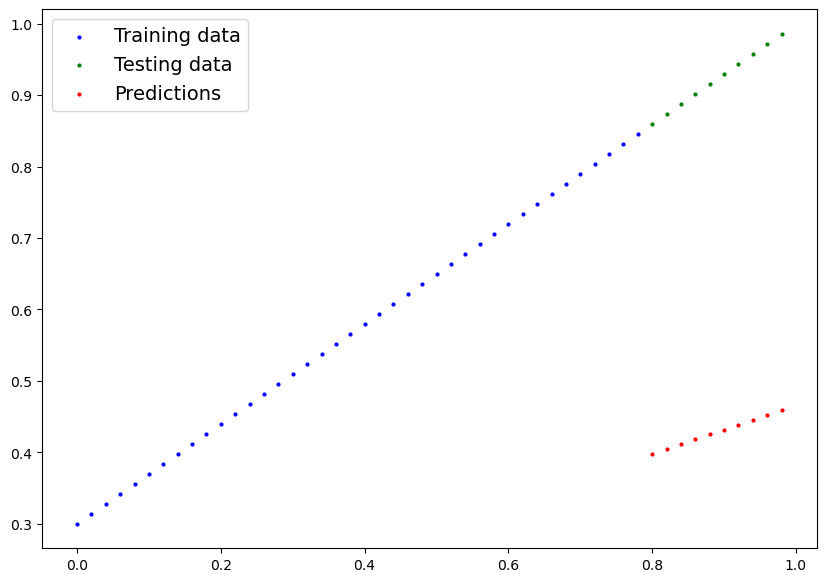

In [30]:
plot_predictions(predictions=y_preds);

## 3. Train model

The whole ideas of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters

in in other words from a poor representation of the data to a better representation of the data. 

One way to measure how poor or how wrong your models predictions are is to use a loss function. 

* Note: Loss function may also be called cost function or criterion in different areas. for our case, we're going to refer to it as a loss function. 

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias) to improve the loss function.

and specifically for PyTorch, we need: 
* A training loop
* A testing loop

In [93]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [94]:
# check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [95]:
# set up a loss function
loss_fn = nn.L1Loss()

# Set up an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # lr = learning rate = possible the most important hyperparameter you can set
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

Forexample, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()`

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimize zero grad
4. Loss backwards - move backwards through the network to calculate the gradients of each of the parameters of out model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss. (**gradient descent**)


In [96]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [103]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we set it ourselves)
epochs = 100

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode im PyTorch sets all the parameters that require gradients to require gradients

    #1. Forward pass
    y_pred = model_0(X_train)

    #2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    #5. Perform gradient descent
    optimizer.step() # by default how the optimizer changes will accumulate through the loop .. so we have to zero them

    ### Testing
    model_0.eval() # tuns off settings in the model only needed for evaluation
    with torch.inference_mode(): # turns off gradient tracking and a couple of other things behind the scenes
        # 1. do the forward pass
        test_pred = model_0(X_test)

        # 2. calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # print out what happened
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

        #print(model_0.state_dict())
        print(model_0.state_dict())
    

Epoch: 0 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 10 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 20 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 30 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 40 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 50 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 60 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias',

In [108]:
import numpy as np
epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

([0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 array([0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

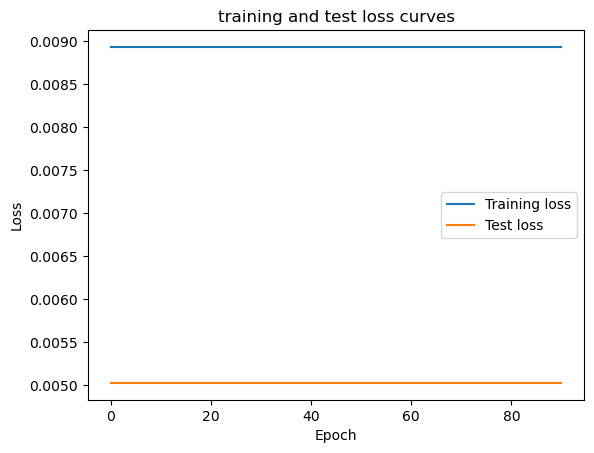

In [109]:
#plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Training loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend();

In [42]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [43]:
weight, bias

(0.7, 0.3)

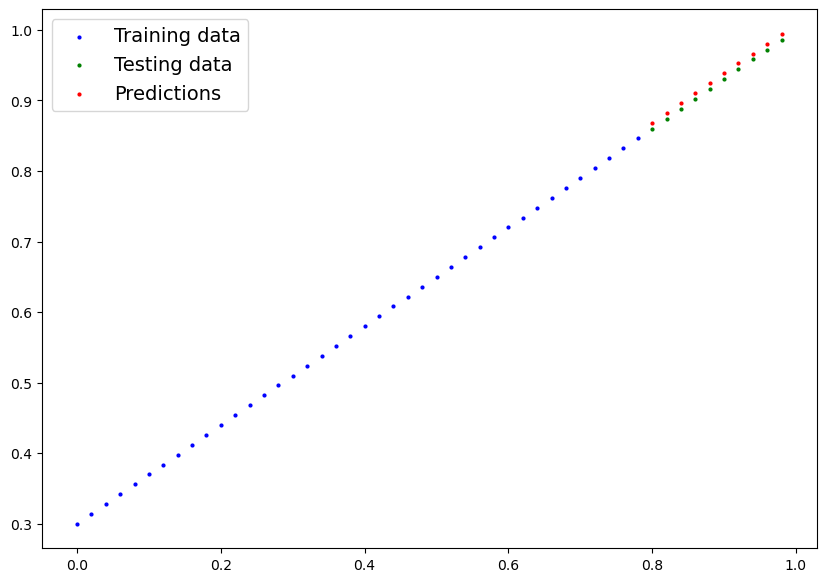

In [105]:
plot_predictions(predictions=test_pred);

## Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save PyTorch object in Pythons pickle format.
2. `torch.load()` - allows you to load a save PyTorch object.
3. `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state dictionary

In [112]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create a model directory
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Save the model
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: model/01_pytorch_workflow_model_0.pth


In [113]:
loaded_model = torch.load(MODEL_SAVE_PATH)
loaded_model

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])